In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


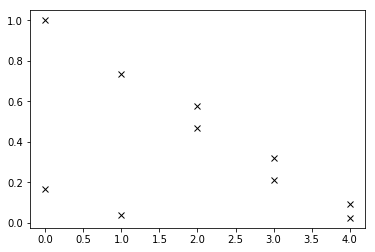

In [4]:
def H(i,j):
    H = 2*J*spins[i, j]*sum([
                            spins[(i+1)%N,j],
                            spins[(i-1)%N,j],
                            spins[i,(j+1)%N],
                            spins[i,(j-1)%N]])
    return H

N = 16             #  lenth of the ring
J =  1              #  coupling constant
T =  np.linspace(0,4,5)
repeat = 2
energie = np.zeros((len(T),repeat))
heat = np.zeros((len(T),repeat))
mag = np.zeros((len(T),repeat))
for nt, t in enumerate(T):
    for l in range(repeat):
        spins = np.random.choice((-1,1),(N,N))
        for n in range(10):
            for i in np.random.permutation([(x,y) for x in range(N) for y in range(N)]):
                if H(i[0],i[1])<=0:
                    spins[i[0], i[1]] *= -1
                elif np.exp(-H(i[0],i[1])/t) > np.random.rand():
                    spins[i[0], i[1]] *= -1
                heat[nt,l] += abs(np.sum(spins))/N/N
                energie[nt,l] += H(i[0],i[1])/N/N
        mag[nt,l] = abs(np.sum(spins))/N/N
        
        
plt.plot(T,mag,"xk")
plt.show()

In [12]:
T

array([0., 1., 2., 3., 4.])

In [11]:
T[:np.newaxis]

array([0., 1., 2., 3., 4.])

In [13]:
T[np.newaxis]

array([[0., 1., 2., 3., 4.]])